In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

### Função auxiliar para imprimir a matriz de confusão

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Carrega o dataset Iris

In [3]:
iris = load_iris()

X = iris.data
y = iris.target
class_names = iris.target_names

### Mostra o formato de X e y, e também mostra os nomes das classes

In [4]:
print("X: ", X.shape)
print("y: ", y.shape)
print("Nomes das classes: ", class_names)

X:  (150, 4)
y:  (150,)
Nomes das classes:  ['setosa' 'versicolor' 'virginica']


### Separa o dataset em treinamento, validação e teste

In [5]:
X_training_and_validation, X_test, y_training_and_validation, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=1)

X_training, X_validation, y_training, y_validation = train_test_split(X_training_and_validation, y_training_and_validation, train_size=0.8235, test_size=0.1765, random_state=1)

### Treina um modelo de regressão logística

In [6]:
classifier = LogisticRegression(C=1)
classifier.fit(X=X_training, y=y_training)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediz com o classificador treinado no conjunto de validação

In [7]:
y_validation_pred = classifier.predict(X_validation)

### Obtém a matriz de confusão das predições feitas no conjunto de validação

Confusion matrix, without normalization
[[ 3  0  0]
 [ 0 10  3]
 [ 0  0  7]]


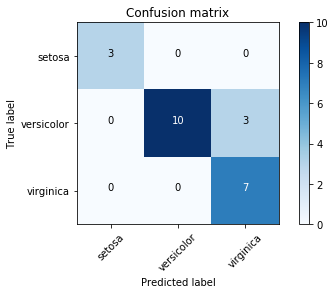

In [8]:
c_matrix_validation = confusion_matrix(y_validation, y_validation_pred)

plot_confusion_matrix(c_matrix_validation, classes=class_names)

### Imprime diversas métricas de qualidade no conjunto de validação

In [9]:
accuracy_validation = accuracy_score(y_validation, y_validation_pred) * 100
precision_validation = precision_score(y_validation, y_validation_pred, average="macro") * 100
recall_validation = recall_score(y_validation, y_validation_pred, average="macro") * 100
f1_validation = f1_score(y_validation, y_validation_pred, average="macro") * 100

print("--- Conjunto de validação ---")
print("Acurácia: %.2f" % accuracy_validation)
print("Precisão: %.2f" % precision_validation)
print("Recall: %.2f" % recall_validation)
print("F1: %.2f" % f1_validation)

--- Conjunto de validação ---
Acurácia: 86.96
Precisão: 90.00
Recall: 92.31
F1: 89.77


### Prediz com o classificador treinado no conjunto de teste

In [10]:
#y_test_pred = classifier.predict(X_test)

### Obtém a matriz de confusão das predições feitas no conjunto de teste

In [11]:
#c_matrix = confusion_matrix(y_test, y_test_pred)

#plot_confusion_matrix(c_matrix, classes=class_names)

### Imprime diversas métricas de qualidade no conjunto de teste

In [12]:
#accuracy_test = accuracy_score(y_test, y_test_pred) * 100
#precision_test = precision_score(y_test, y_test_pred, average="macro") * 100
#recall_test = recall_score(y_test, y_test_pred, average="macro") * 100
#f1_test = f1_score(y_test, y_test_pred, average="macro") * 100

#print("--- Conjunto de teste ---")
#print("Acurácia: %.2f" % accuracy_test)
#print("Precisão: %.2f" % precision_test)
#print("Recall: %.2f" % recall_test)
#print("F1: %.2f" % f1_test)